In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


DATASET 

In [2]:
import pandas as pd
url='/content/gdrive/MyDrive/Hate_speech-acm/hate_speech.csv'

In [3]:

import os, shutil
import pandas as pd
dataset=pd.read_csv(url,names=['tweet','class'])
dataset

,tweet,class
0,Knowing ki Vikas kitna samjhata hai Priyanka a...,no
1,I am Muhajir .. Aur mere lye sab se Pehly Paki...,no
2,Doctor sab sahi me ke PhD (in hate politics) ...,no
3,Poore Desh me Patel OBC me aate Hain sirf gujr...,no
4,Sarkar banne ke bad Hindu hit me ek bhi faisla...,yes
...,...,...
4574,ye attankwadi Indian agent hai jo terrorism ph...,no
4575,bola na terrorism ko support karna band karoge...,no
4576,lagta hai aap ne movie dekhi hai which is writ...,no
4577,tum log terrorism ko support karna band kardo ...,no


In [4]:
dataset.dropna(subset = ["tweet"], inplace=True)
dataset["class"].describe()

count     4578
unique       4
top         no
freq      3308
Name: class, dtype: object

In [5]:
dataset["class"]=dataset["class"].replace(to_replace =['n','on'], value ='no')
pd.unique(dataset["class"])

array(['no', 'yes'], dtype=object)

In [6]:
# Adding text-length as a field in the dataset
dataset['text length'] = dataset['tweet'].apply(len)
print(dataset.head())

                                               tweet class  text length
0  Knowing ki Vikas kitna samjhata hai Priyanka a...    no          126
1  I am Muhajir .. Aur mere lye sab se Pehly Paki...    no          196
2  Doctor  sab sahi me ke PhD (in hate politics) ...    no          166
3  Poore Desh me Patel OBC me aate Hain sirf gujr...    no          257
4  Sarkar banne ke bad Hindu hit me ek bhi faisla...   yes          140


DATA VISUALIZATION

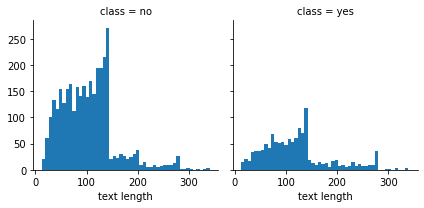

In [7]:
#Basic visualization of data using histograms
# FacetGrid- Multi-plot grid for plotting conditional relationships
import seaborn as sns
import matplotlib.pyplot as plt
graph = sns.FacetGrid(data=dataset, col='class')
graph.map(plt.hist, 'text length', bins=50)

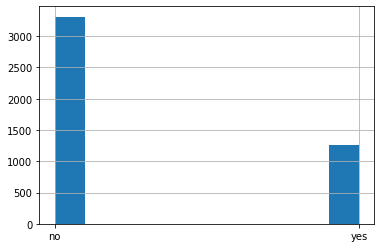

In [8]:
dataset['class'].hist()

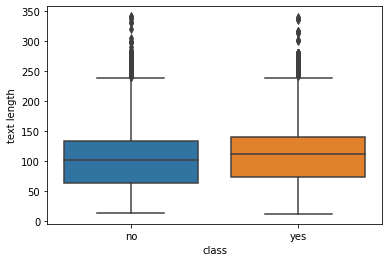

In [9]:
# Box-plot visvualization
sns.boxplot(x='class', y='text length', data=dataset)

DATASET PREPROCESSING

In [10]:
dataset["class"]=dataset["class"].replace(to_replace =['no'], value =0)
dataset["class"]=dataset["class"].replace(to_replace =['yes'], value =1)

In [11]:
 
train = dataset.iloc[:3843,:-1] 
test = dataset.iloc[3843:,:-1] 

In [12]:
train[train['class'] == 0].head(10)

,tweet,class
0,Knowing ki Vikas kitna samjhata hai Priyanka a...,0
1,I am Muhajir .. Aur mere lye sab se Pehly Paki...,0
2,Doctor sab sahi me ke PhD (in hate politics) ...,0
3,Poore Desh me Patel OBC me aate Hain sirf gujr...,0
6,Ek dil ek jaan akal ke imitihaan kal KP ke rap...,0
9,I am very sorry to say saaf dil shilpa ke fans...,0
10,"Madam,Bahut sochsamajhkr Mai ESS tarq pe purey...",0
12,"Ha rem """" emoji I hate this emoji! Mujhe nagi...",0
14,Sir apki fav kon hai iss seasn mai??,0
15,Mehanat to school me copy karke likhne me b la...,0


In [13]:
train[train['class'] == 1].head(10)

,tweet,class
4,Sarkar banne ke bad Hindu hit me ek bhi faisla...,1
5,Hate it jab test ata ho phr bh acha na ho -.-,1
7,Aise logo se sakht nafrat karta hu Jo caste ko...,1
8,"Sir, jyada sentimental mat ho jao peene ke baa...",1
11,I hate sapna yaar Coz khud ko toh chalana aati...,1
13,Hate heena..... too much irritating n bat karn...,1
19,"Code phatta hai toh phatne do, Mujhe project s...",1
20,Arsi bahar jani chahiye.... I hate arsi khan,1
22,"Karachi say agencies panjabi, pathano ko qatal...",1
27,Haa bhai. Ye chutiye log ki hatred apni liye m...,1


In [14]:
train.shape, test.shape

((3843, 2), (735, 2))

In [15]:
train["class"].value_counts()

0    2871
1     972
Name: class, dtype: int64

In [16]:
combi = train.append(test, ignore_index=True, sort=True)
combi.shape

(4578, 2)

1. Removing Twitter Handles (@user)

In [17]:
import numpy as np
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head(10)

,class,tweet,tidy_tweet
0,0,Knowing ki Vikas kitna samjhata hai Priyanka a...,Knowing ki Vikas kitna samjhata hai Priyanka a...
1,0,I am Muhajir .. Aur mere lye sab se Pehly Paki...,I am Muhajir .. Aur mere lye sab se Pehly Paki...
2,0,Doctor sab sahi me ke PhD (in hate politics) ...,Doctor sab sahi me ke PhD (in hate politics) ...
3,0,Poore Desh me Patel OBC me aate Hain sirf gujr...,Poore Desh me Patel OBC me aate Hain sirf gujr...
4,1,Sarkar banne ke bad Hindu hit me ek bhi faisla...,Sarkar banne ke bad Hindu hit me ek bhi faisla...
5,1,Hate it jab test ata ho phr bh acha na ho -.-,Hate it jab test ata ho phr bh acha na ho -.-
6,0,Ek dil ek jaan akal ke imitihaan kal KP ke rap...,Ek dil ek jaan akal ke imitihaan kal KP ke rap...
7,1,Aise logo se sakht nafrat karta hu Jo caste ko...,Aise logo se sakht nafrat karta hu Jo caste ko...
8,1,"Sir, jyada sentimental mat ho jao peene ke baa...","Sir, jyada sentimental mat ho jao peene ke baa..."
9,0,I am very sorry to say saaf dil shilpa ke fans...,I am very sorry to say saaf dil shilpa ke fans...


2. Removing Punctuations, Numbers, and Special Characters

In [18]:
combi.tidy_tweet = combi.tidy_tweet.str.replace("[^a-zA-Z#]", " ")
combi.head(10)

,class,tweet,tidy_tweet
0,0,Knowing ki Vikas kitna samjhata hai Priyanka a...,Knowing ki Vikas kitna samjhata hai Priyanka a...
1,0,I am Muhajir .. Aur mere lye sab se Pehly Paki...,I am Muhajir Aur mere lye sab se Pehly Paki...
2,0,Doctor sab sahi me ke PhD (in hate politics) ...,Doctor sab sahi me ke PhD in hate politics ...
3,0,Poore Desh me Patel OBC me aate Hain sirf gujr...,Poore Desh me Patel OBC me aate Hain sirf gujr...
4,1,Sarkar banne ke bad Hindu hit me ek bhi faisla...,Sarkar banne ke bad Hindu hit me ek bhi faisla...
5,1,Hate it jab test ata ho phr bh acha na ho -.-,Hate it jab test ata ho phr bh acha na ho
6,0,Ek dil ek jaan akal ke imitihaan kal KP ke rap...,Ek dil ek jaan akal ke imitihaan kal KP ke rap...
7,1,Aise logo se sakht nafrat karta hu Jo caste ko...,Aise logo se sakht nafrat karta hu Jo caste ko...
8,1,"Sir, jyada sentimental mat ho jao peene ke baa...",Sir jyada sentimental mat ho jao peene ke baa...
9,0,I am very sorry to say saaf dil shilpa ke fans...,I am very sorry to say saaf dil shilpa ke fans...


3. Removing Short Words

In [19]:
combi.tidy_tweet = combi.tidy_tweet.apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
combi.head(10)

,class,tweet,tidy_tweet
0,0,Knowing ki Vikas kitna samjhata hai Priyanka a...,Knowing Vikas kitna samjhata Priyanka Itch Gua...
1,0,I am Muhajir .. Aur mere lye sab se Pehly Paki...,Muhajir mere Pehly Pakistan lakh Altaf Jese le...
2,0,Doctor sab sahi me ke PhD (in hate politics) ...,Doctor sahi hate politics wale Bhai padhe likh...
3,0,Poore Desh me Patel OBC me aate Hain sirf gujr...,Poore Desh Patel aate Hain sirf gujrat chor ma...
4,1,Sarkar banne ke bad Hindu hit me ek bhi faisla...,Sarkar banne Hindu faisla dwara liya gaya goba...
5,1,Hate it jab test ata ho phr bh acha na ho -.-,Hate test acha
6,0,Ek dil ek jaan akal ke imitihaan kal KP ke rap...,jaan akal imitihaan rape sawing between legs a...
7,1,Aise logo se sakht nafrat karta hu Jo caste ko...,Aise logo sakht nafrat karta caste naam sath c...
8,1,"Sir, jyada sentimental mat ho jao peene ke baa...",jyada sentimental peene baad Jiss desh buniyad...
9,0,I am very sorry to say saaf dil shilpa ke fans...,very sorry saaf shilpa fans hiten mein samjhte...


4. Text Normalization

In [20]:
tokenized_tweet = combi.tidy_tweet.apply(lambda x: x.split())
tokenized_tweet.head()

0    [Knowing, Vikas, kitna, samjhata, Priyanka, It...
1    [Muhajir, mere, Pehly, Pakistan, lakh, Altaf, ...
2    [Doctor, sahi, hate, politics, wale, Bhai, pad...
3    [Poore, Desh, Patel, aate, Hain, sirf, gujrat,...
4    [Sarkar, banne, Hindu, faisla, dwara, liya, ga...
Name: tidy_tweet, dtype: object

In [21]:
# Now we can normalize the tokenized tweets.

from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [know, vika, kitna, samjhata, priyanka, itch, ...
1    [muhajir, mere, pehli, pakistan, lakh, altaf, ...
2    [doctor, sahi, hate, polit, wale, bhai, padh, ...
3    [poor, desh, patel, aat, hain, sirf, gujrat, c...
4    [sarkar, bann, hindu, faisla, dwara, liya, gay...
Name: tidy_tweet, dtype: object

In [22]:
# Now let’s stitch these tokens back together. It can easily be done using nltk’s MosesDetokenizer function.

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combi['tidy_tweet'] = tokenized_tweet
combi.head(10)

,class,tweet,tidy_tweet
0,0,Knowing ki Vikas kitna samjhata hai Priyanka a...,know vika kitna samjhata priyanka itch guard u...
1,0,I am Muhajir .. Aur mere lye sab se Pehly Paki...,muhajir mere pehli pakistan lakh altaf jese le...
2,0,Doctor sab sahi me ke PhD (in hate politics) ...,doctor sahi hate polit wale bhai padh likh baa...
3,0,Poore Desh me Patel OBC me aate Hain sirf gujr...,poor desh patel aat hain sirf gujrat chor manu...
4,1,Sarkar banne ke bad Hindu hit me ek bhi faisla...,sarkar bann hindu faisla dwara liya gaya gobar...
5,1,Hate it jab test ata ho phr bh acha na ho -.-,hate test acha
6,0,Ek dil ek jaan akal ke imitihaan kal KP ke rap...,jaan akal imitihaan rape saw between leg after...
7,1,Aise logo se sakht nafrat karta hu Jo caste ko...,ais logo sakht nafrat karta cast naam sath cha...
8,1,"Sir, jyada sentimental mat ho jao peene ke baa...",jyada sentiment peen baad jiss desh buniyad si...
9,0,I am very sorry to say saaf dil shilpa ke fans...,veri sorri saaf shilpa fan hiten mein samjht h...


 Understanding the common words used in the tweets: WordCloud

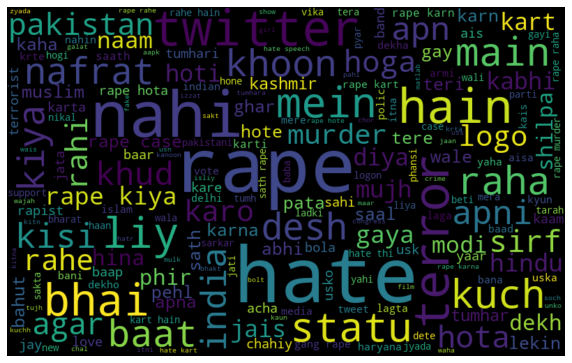

In [23]:
all_words = ' '.join([text for text in combi['tidy_tweet']]) 

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

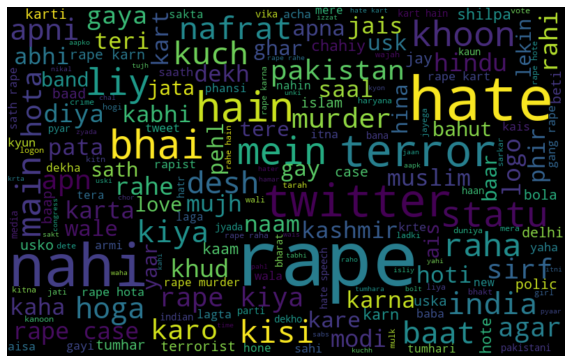

In [24]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['class'] == 0]]) 

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

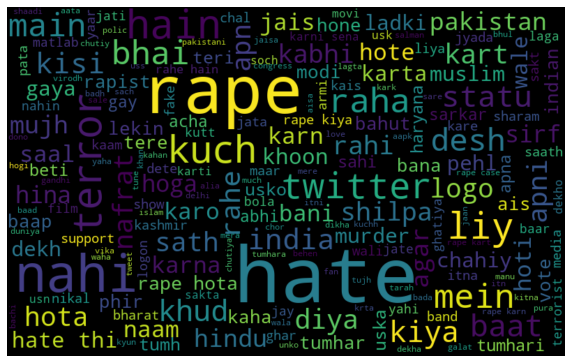

In [25]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['class'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

FEATURE EXTRACTION

1.1 BOW Features




1.5 Fasttext Features

In [26]:
embedding_size = 200
window_size = 2
min_word = 5
down_sampling = 1e-2

In [27]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
from gensim.models.fasttext import FastText
ft_model = FastText(tokenized_tweet,
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      sg=1,
                      iter=100)

In [28]:
print(ft_model.wv['Knowing ki Vikas kitna samjhata hai Priyanka'])

[-0.39386684 -0.11276718  0.33330846 -0.206737    0.03494131 -0.29566565
 -0.08526523 -0.0669983  -0.01007682 -0.28811255 -0.38749722  0.5706947
  0.07556582 -0.12235853  0.35180604 -0.14282137  0.3969453  -0.03088058
  0.3358189  -0.377337   -0.158544   -0.0075191   0.1941672  -0.15506639
  0.1834634   0.05823317 -0.02516299  0.03819317  0.19570883  0.19244404
  0.07935048  0.16719872 -0.04997215  0.14202061  0.1764437   0.12678964
 -0.3389393  -0.38228047  0.1397066   0.31388596 -0.1253596   0.00974615
 -0.02232883  0.06614198 -0.09692873 -0.10074201 -0.11811563 -0.01002256
  0.3079771   0.08086548  0.03982628  0.17684552 -0.10564134  0.25280726
  0.09140486 -0.03097778  0.21954957  0.13901563 -0.14188713 -0.07690711
 -0.38677326  0.07223686 -0.04403713  0.05590272 -0.14495207 -0.5097688
 -0.12240532 -0.04622504 -0.21853596  0.12192038 -0.17193624  0.06732938
 -0.01131266 -0.18788625  0.2602501   0.07621181 -0.06204319  0.37795064
 -0.03281555  0.32751188 -0.15749635 -0.11053592 -0.2

In [29]:
semantically_similar_words = {words: [item[0] for item in ft_model.wv.most_similar([words], topn=5)]
                  for words in ['artificial', 'intelligence', 'machine', 'network', 'recurrent', 'pakistan']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

artificial:['social', 'politician', '#modionze', 'cultur', 'badhti']
intelligence:['intern', 'chintskap', 'realiti', 'realli', 'some']
machine:['machin', 'bodi', 'himach', 'achi', 'tune']
network:['neta', 'ravish', 'rajya', 'bhagwi', 'kejriw']
recurrent:['secur', 'record', 'student', 'offic', 'agent']
pakistan:['#pakistan', 'pakistani', 'porkistan', 'paki', 'rapistan']


In [30]:
def word_vector(tokens, size):
     vec = np.zeros(size).reshape((1, size))
     count = 0.
     for word in tokens:
         try:
             vec += ft_model[word].reshape((1, size))
             count += 1.
         except KeyError: # handling the case where the token is not in vocabulary
                        
             continue
     if count != 0:
         vec /= count
     return vec

In [31]:
import numpy as np
fasttext_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    fasttext_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    
fasttext_df = pd.DataFrame(fasttext_arrays)
fasttext_df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(4578, 200)

In [32]:
fasttext_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,-0.242034,-0.363075,0.411181,-0.239267,0.007408,-0.163961,-0.107398,-0.097509,0.004098,-0.053069,-0.186443,0.196292,-0.032144,0.067284,0.106338,-0.208986,0.151760,-0.209782,0.192655,-0.436795,-0.145933,-0.187469,0.208587,0.038025,0.306005,0.057738,-0.103101,0.311312,0.099859,0.160902,0.006521,-0.117574,-0.058460,0.213506,0.141492,0.047445,-0.481144,-0.307500,0.199397,0.182523,...,-0.009953,0.232120,0.276762,0.191836,0.185825,-0.157237,0.492130,0.054862,-0.033234,-0.029863,0.073197,-0.144790,-0.044931,0.143786,-0.441836,-0.069115,-0.248421,0.146893,0.457983,0.101799,0.163518,0.429463,0.143467,0.195870,0.145319,-0.335756,0.079692,-0.222498,-0.045863,0.135733,-0.094669,-0.059337,-0.205579,-0.047761,0.162281,-0.104870,-0.215146,-0.070996,-0.078671,0.274309
1,-0.386539,-0.027880,0.465270,-0.217919,-0.110259,-0.177254,0.017127,-0.319882,-0.075266,-0.269886,-0.259892,0.444057,-0.304840,-0.068564,0.364272,-0.057192,0.109274,-0.291507,0.118502,-0.574995,0.048612,-0.128102,0.524805,-0.023688,0.469618,0.113608,-0.227224,0.088006,0.304627,0.195799,0.062912,-0.304684,0.147006,0.031558,0.331416,0.078029,-0.155534,-0.294431,0.175734,0.192759,...,0.061176,0.276600,0.073939,0.223650,0.204302,-0.115047,0.391090,0.181786,-0.159254,-0.289602,0.229653,-0.048856,-0.340476,0.080394,-0.460110,0.231248,0.265232,0.179165,0.292777,0.272699,-0.103826,0.386105,0.065365,0.049221,-0.016947,-0.336515,0.121583,0.039074,-0.296323,0.264858,-0.132935,-0.038930,-0.181135,0.166035,0.162267,-0.116958,-0.237667,-0.231005,0.009223,0.324033
2,-0.229805,-0.059239,0.604448,-0.366602,-0.146608,-0.216226,-0.163586,-0.343629,0.046318,-0.311640,-0.214515,0.146388,-0.149359,-0.164206,0.375975,-0.295601,-0.096504,-0.393315,0.088220,-0.464422,-0.064986,-0.230757,0.362672,-0.023662,0.421112,-0.043522,0.038706,0.312826,0.467303,0.180495,-0.149518,-0.268853,0.013284,0.116068,0.148379,-0.106149,-0.207069,-0.250828,0.138505,0.257907,...,0.117222,0.180083,0.408819,0.066432,0.168960,-0.171551,0.423052,0.278297,0.092718,-0.127620,0.082710,0.044907,-0.265704,0.392886,-0.496391,0.069643,-0.157655,0.106696,0.315347,0.313725,0.073793,0.351137,0.082864,0.116157,-0.113185,-0.318693,0.108749,-0.109257,-0.040800,0.093239,-0.077276,0.028791,-0.123440,-0.171867,0.013187,0.095875,-0.138075,0.145051,0.046759,0.115820
3,-0.334833,0.047919,0.300276,-0.240882,-0.049241,0.023168,-0.074340,-0.229880,0.046732,-0.287229,-0.140979,0.159517,-0.087740,-0.013926,0.383319,-0.126741,-0.099016,-0.426715,0.044902,-0.335362,0.053743,0.016640,0.471192,0.066368,0.452836,-0.059742,-0.000941,0.114805,0.233156,0.086633,0.043630,-0.141764,0.028483,0.006793,0.084301,0.081720,-0.247683,-0.051386,0.174135,0.246503,...,0.193094,0.347864,0.129393,0.295302,0.147589,-0.042016,0.277477,0.183569,-0.024796,-0.244396,0.187033,0.134484,-0.265898,0.180767,-0.210601,-0.031639,0.028352,0.183408,0.269160,0.348276,0.090569,0.329160,0.093089,0.095115,-0.134023,-0.146683,0.019474,-0.092999,-0.068987,0.124279,-0.064822,-0.049427,-0.227446,0.075841,-0.056742,-0.117660,-0.152451,0.016771,-0.082027,0.092913
4,-0.393320,-0.051451,0.464259,-0.467856,0.000927,-0.083014,-0.058294,-0.286291,-0.053019,-0.238956,-0.187314,0.309174,-0.116219,-0.109386,0.271944,-0.212769,-0.034256,-0.331990,0.276877,-0.360477,0.159491,-0.017606,0.414003,0.145649,0.421198,-0.051256,-0.038686,0.263671,0.346460,0.300816,0.002996,-0.320687,0.054019,0.079959,0.207155,-0.032490,-0.037993,-0.174639,0.120138,0.221903,...,0.264527,0.353465,0.102725,0.286078,-0.015536,0.070227,0.154804,0.048198,-0.020033,-0.061508,0.151025,0.079431,-0.223937,0.094884,-0.439804,0.041789,-0.105053,0.095302,0.317868,0.239192,-0.036451,0.425025,0.026933,-0.012831,-0.118211,-0.277222,-0.011241,-0.142740,-0.266465,0.066405,-0.

In [33]:
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix, accuracy_score

In [34]:
train_w2v = fasttext_df.iloc[:3843,:]
test_w2v = fasttext_df.iloc[3843:,:]

# splitting data into training and validation set 
xtrain_w2v, xvalid_w2v, ytrain, yvalid = train_test_split(train_w2v, train['class'], random_state=42, test_size=0.3)

In [35]:
from sklearn import svm
svc = svm.SVC(kernel='rbf', C=1, probability=True).fit(xtrain_w2v, ytrain) 
prediction = svc.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.2 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.4431818181818181

In [36]:
#classifiction Report

report = classification_report( yvalid, prediction_int )
print(report)
acc1=accuracy_score(yvalid,prediction_int)

print("SVM-RBF(fasttext), Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.85      0.39      0.53       859
           1       0.31      0.80      0.44       294

    accuracy                           0.49      1153
   macro avg       0.58      0.59      0.49      1153
weighted avg       0.71      0.49      0.51      1153

SVM-RBF(fasttext), Accuracy Score: 0.4900260190806591


In [37]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1,10,100], 'kernel': ['linear','rbf']}]
grid_search = GridSearchCV(estimator= svc,
                          param_grid = parameters, scoring = 'accuracy',cv = 10)
grid_search = grid_search.fit(xtrain_w2v, ytrain)
print(grid_search.best_params_)
prediction = grid_search.predict(xvalid_w2v)  

#classifiction Report

report = classification_report( yvalid, prediction)
print(report)
acc1=accuracy_score(yvalid,prediction)

print("SVM(Fasttext) after HT+GD, Accuracy Score:",acc1)

{'C': 100, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.75      1.00      0.85       859
           1       0.00      0.00      0.00       294

    accuracy                           0.75      1153
   macro avg       0.37      0.50      0.43      1153
weighted avg       0.56      0.75      0.64      1153

SVM(Fasttext) after HT+GD, Accuracy Score: 0.7450130095403296


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


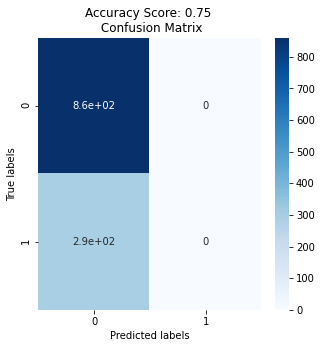

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


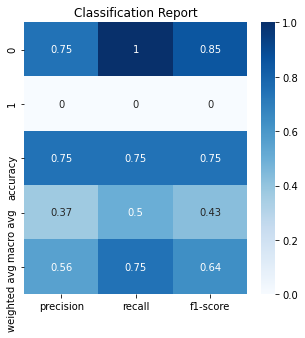

In [38]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = grid_search.score(xvalid_w2v, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

In [42]:
from sklearn.model_selection import RandomizedSearchCV
svc = svm.SVC()

# Create the random grid
random_grid = {'C': [1,10,100], 
              'kernel': ['linear','rbf']}
              
rf_random = RandomizedSearchCV(estimator = svc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain_w2v, ytrain)
print(rf_random.best_params_)
prediction = rf_random.predict(xvalid_w2v) 

#classifiction Report

report = classification_report( yvalid, prediction)
print(report)
acc1=accuracy_score(yvalid,prediction)

print("SVM(Fasttext) after HT+RS, Accuracy Score:",acc1)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=100. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   56.3s finished


{'kernel': 'rbf', 'C': 1}
              precision    recall  f1-score   support

           0       0.75      1.00      0.85       859
           1       1.00      0.00      0.01       294

    accuracy                           0.75      1153
   macro avg       0.87      0.50      0.43      1153
weighted avg       0.81      0.75      0.64      1153

SVM(Fasttext) after HT+RS, Accuracy Score: 0.7458803122289679


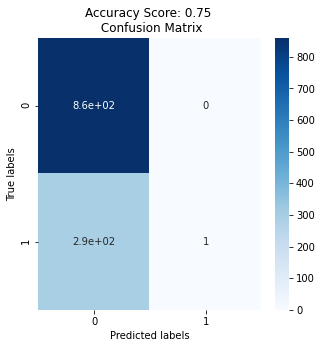

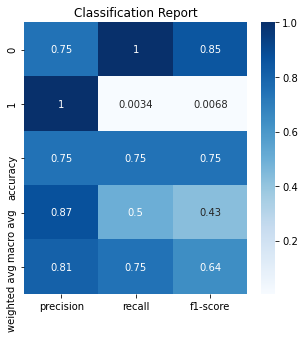

In [43]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score =rf_random.score(xvalid_w2v, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain) 
prediction = rf.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.020134228187919462

In [45]:
#classifiction Report

report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("RF(doc2vec), Accuracy Score:",acc1)

              precision    recall  f1-score   support

           0       0.75      1.00      0.85       859
           1       0.75      0.01      0.02       294

    accuracy                           0.75      1153
   macro avg       0.75      0.50      0.44      1153
weighted avg       0.75      0.75      0.64      1153

RF(doc2vec), Accuracy Score: 0.7467476149176062


In [46]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier()
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 1000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(xtrain_w2v, ytrain)

print("best Params")
print(rf_random.best_params_)

prediction = rf_random.predict(xvalid_w2v)

#classifiction Report
report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("RF(Fasttext) after HT+RS, Accuracy Score:",acc1)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 51.5min finished


best Params
{'n_estimators': 797, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}
              precision    recall  f1-score   support

           0       0.75      1.00      0.85       859
           1       0.50      0.01      0.01       294

    accuracy                           0.75      1153
   macro avg       0.62      0.50      0.43      1153
weighted avg       0.68      0.75      0.64      1153

RF(Fasttext) after HT+RS, Accuracy Score: 0.7450130095403296


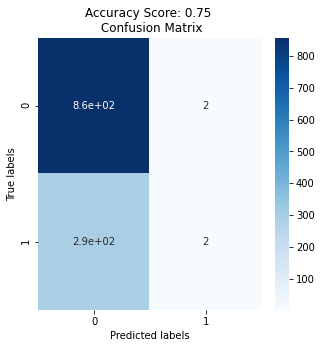

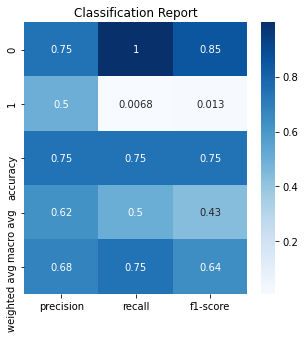

In [47]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = rf_random.score(xvalid_w2v, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

In [48]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(xtrain_w2v, ytrain)

print("best Params")
print(grid_search.best_params_)

prediction = grid_search.predict(xvalid_w2v)

#classifiction Report

report = classification_report( yvalid, prediction )
print(report)
acc1=accuracy_score(yvalid,prediction)

print("RF(Fasttextvec) after HT+GS, Accuracy Score:",acc1)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 22.9min finished


best Params
{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.75      1.00      0.85       859
           1       1.00      0.00      0.01       294

    accuracy                           0.75      1153
   macro avg       0.87      0.50      0.43      1153
weighted avg       0.81      0.75      0.64      1153

RF(Fasttextvec) after HT+GS, Accuracy Score: 0.7458803122289679


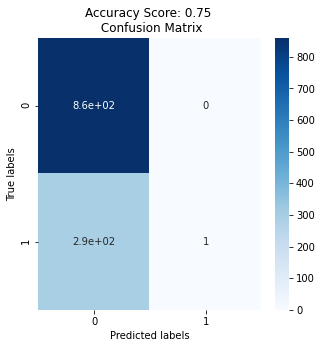

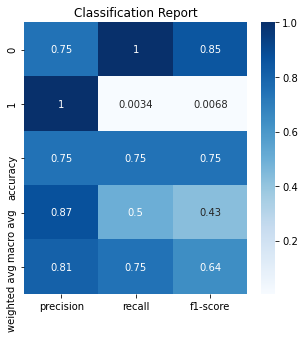

In [49]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
labels=['0','1']
f, ax = plt.subplots(figsize=(5,5))
cm=confusion_matrix(yvalid,prediction)
sns.heatmap(cm, annot=True,ax=ax,cmap="Blues")
#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
score = grid_search.score(xvalid_w2v, yvalid)
ax.set_title('Accuracy Score: {0} \n Confusion Matrix'.format(np.round(score,2)))
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()
f, ax = plt.subplots(figsize=(5,5))
class_report=classification_report(yvalid,prediction,target_names=labels, output_dict=True)
sns.heatmap(pd.DataFrame(class_report).iloc[:-1, :].T, annot=True,ax=ax,cmap="Blues")
ax.set_title('Classification Report')
plt.show()

In [41]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xtrain_w2v, ytrain)
  
# making predictions on the testing set
y_pred = gnb.predict(xvalid_w2v)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(yvalid, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 58.62966175195143
